## 분석 배경

폐암만큼 무서운 만성폐쇄성폐질환 주의보  
https://www.whosaeng.com/133958

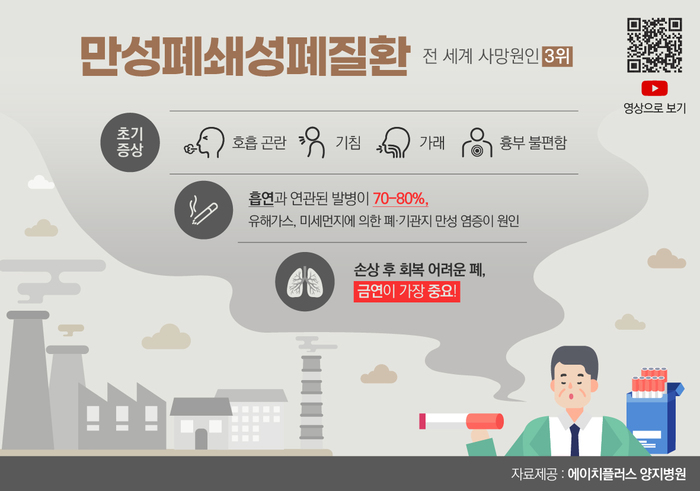

> 2022년 전 세계 사망원인 3위인 만성폐쇄성폐질환(COPD)은 담배 연기나 가스, 분진과 같은 유해 물질에 장기간 노출되어 발생하는 기관지와 폐의 심각한 질환입니다. 보통 10년 이상 이러한 유해 물질에 노출되면 기관지와 폐포가 손상되어 기관지염과 폐기종을 일으킵니다. 이로 인해 환자는 호흡곤란을 경험하고, 감염에 취약해져 급성 기관지염이나 폐렴과 같은 질환에 쉽게 걸리게 됩니다.

> COPD는 당뇨병만큼 흔하고 심각한 질병입니다. 2018년 통계청 사망원인 통계자료에 따르면, 지난 10년 동안 만성하기도 질환(만성폐쇄성폐질환 포함)의 사망률은 사망 원인 순위 6~8위 사이에 위치해 있으며, 이는 당뇨병 사망률과 유사합니다. 이러한 통계는 COPD가 단순한 호흡기 질환이 아니라 전세계적으로 주요 사망 원인 중 하나라는 것을 보여줍니다.

흡연과 만성폐쇄성폐질환  
https://www.kdca.go.kr/filepath/boardDownload.es?bid=0034&list_no=365521&seq=1

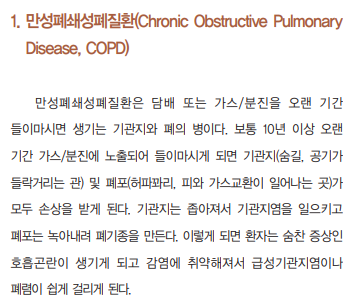
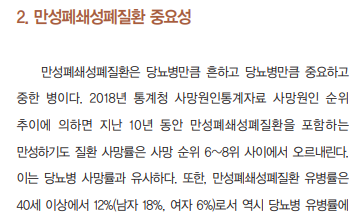

> 이러한 배경에서 이번 분석은 COPD의 주요 요인과 영향을 분석하여 질병의 심각성을 강조하고, 환자들의 삶의 질을 향상시키기 위한 예방 및 관리 방안을 모색하는 것을 목표로 합니다. 특히 흡연 경험, 연령, 성별, 기타 관련 질환 등의 변수가 COPD 중증도에 미치는 영향을 탐구함으로써, 향후 효과적인 치료 및 예방 전략을 수립하는 데 기여하고자 합니다.

> 또한, 해당 데이터의 컬럼은 총 24개로 상당히 많으며 아직 시각화를 다루지 않아 연속형 변수에 대한 EDA(탐색적 자료 분석)이 제한적이고 범주형 변수만 추려도 8개이므로 이번 분석은 범주형 변수를 위주로 COPD의 중증 정도를 확인해보고자 합니다.

In [3]:
# [1] 모둘 로딩
import pandas as pd
import numpy as np

# 데이터 불러오기
data = pd.read_csv('copd.csv')

# 데이터 확인
data.head()

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0


In [4]:
# 결측치 확인
data.isna().sum()

Unnamed: 0      0
ID              0
AGE             0
PackHistory     0
COPDSEVERITY    0
MWT1            2
MWT2            1
MWT1Best        1
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

> 결측치가 존재하긴 하지만 이번 분석에서는 범주형 변수만 사용할 것이기 때문에 MWT 변수들의 결측치를 무시하기로 결정

In [5]:
# 중복값 확인
data.duplicated().sum()

0

> 중복값 없음

## 범주형 변수
> COPDSEVERITY(COPD 중증도)  
> AGEquartiles(나이 사분위수)  
> copd(COPD 유무)  
> gender(성별)  
> smoking(흡연 상태)  
> Diabetes(당뇨병)  
> hypertension(고혈압 유무)  
> AtrialFib(심방세동 유무)  

## 범주형 변수 분포 파악

COPDSEVERITY: COPD 중증도  
(MILD: 경증, MODERATE: 중등도, SEVERE: 중증, VERY SEVERE: 매우 중증) 

In [6]:
data['COPDSEVERITY'].value_counts()
# MILD(경증): 23명, MODERATE(중등도): 43명, SEVERE(중증): 27명, VERY SEVERE(매우 중증): 8명

COPDSEVERITY
MODERATE       43
SEVERE         27
MILD           23
VERY SEVERE     8
Name: count, dtype: int64

여기서 분석의 편의를 위해 MILD를 경증, MODERATE, SEVERE, VERY SEVERE를 중증으로 묶어서 2개의 범주로 생성

In [7]:
copd_list = []

for i in data['COPDSEVERITY']:
    if i == 'MILD':
        copd_list.append('경증')
    else:
        copd_list.append('중증')

data['COPD'] = copd_list
data

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,COPD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,...,4,3,1,2,1,0,0,1,0,중증
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,...,4,2,0,2,1,0,0,1,1,중증
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,...,4,2,0,2,1,0,0,1,0,중증
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,...,1,4,1,2,0,0,1,1,0,중증
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,...,1,3,1,2,0,1,1,0,0,중증
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,10,68,25.0,MILD,511.0,575.0,575.0,2.70,98.0,...,2,1,1,2,0,1,0,0,0,경증
97,98,43,75,40.0,MILD,576.0,577.0,577.0,2.90,93.0,...,3,1,1,2,0,1,0,0,1,경증
98,99,74,68,30.0,MODERATE,468.0,582.0,582.0,1.65,67.0,...,2,2,0,2,0,0,1,0,0,중증
99,100,108,54,30.0,SEVERE,688.0,699.0,699.0,1.72,44.0,...,1,3,1,2,0,0,0,0,0,중증


AGEquartiles: 연령 사분위수  
(사분위수: 데이터의 개수를 4등분 했을때 1/4, 2/4, 3/4, 4/4 지점의 값)

In [8]:
data['AGEquartiles'].value_counts()
# 1(0~1사분위수): 26명, 2(1~2사분위수): 24명, 3(2~3사분위수): 28명, 4(3~4사분위수): 23명

AGEquartiles
3    28
1    26
2    24
4    23
Name: count, dtype: int64

copd: COPD 유무  
(1: Mild, 2: Moderate, 3: Severe, 4: Very severe)

In [9]:
data['copd'].value_counts()

copd
2    43
3    27
1    23
4     8
Name: count, dtype: int64

In [10]:
data.loc[:, ['COPDSEVERITY', 'copd']].value_counts()

COPDSEVERITY  copd
MODERATE      2       43
SEVERE        3       27
MILD          1       23
VERY SEVERE   4        8
Name: count, dtype: int64

> 확인 결과 copd 컬럼은 COPDSEVERITY 컬럼과 같은 데이터로 파악되어 분석에서 제외

gender: 성별  
(0: 여자, 1: 남자)

In [11]:
data['gender'].value_counts()
# 1(남자): 65명, 0(여자): 36명

gender
1    65
0    36
Name: count, dtype: int64

smoking: 흡연 상태  
(1: 현재 금연자, 2: 현재 흡연자)

In [12]:
data['smoking'].value_counts()
# 1(금연자): 16명, 2(흡연자): 85명

smoking
2    85
1    16
Name: count, dtype: int64

Diabetes: 당뇨병 유무  
(0: 없음, 1: 있음)

In [13]:
data['Diabetes'].value_counts()
# 0(당뇨병X): 80명, 1(당뇨병O): 21명

Diabetes
0    80
1    21
Name: count, dtype: int64

hypertension: 고혈압 유무  
(0: 없음, 1: 있음)

In [14]:
data['hypertension'].value_counts()
# 0(고혈압X): 89명, 1(고혈압O): 12명

hypertension
0    89
1    12
Name: count, dtype: int64

AtrialFib: 심방세동 유무  
(0: 없음, 1: 있음)

In [15]:
data['AtrialFib'].value_counts()
# 0(고혈압X): 81명, 1(고혈압O): 20명

AtrialFib
0    81
1    20
Name: count, dtype: int64

## 범주형 변수에 따른 COPD 중증도 비율 파악

In [16]:
# 범주형 변수에 따른 COPD 중증도 도수를 출력해주는 함수 생성
def print_freq(var, copd):
    return data.loc[:, [var, copd]].value_counts()

### (1) AGEquartiles(나이 사분위수)
(사분위수: 데이터의 개수를 4등분 했을때 1/4, 2/4, 3/4, 4/4 지점의 값)

In [17]:
# 나이의 최소값, 중앙값, 최대값 확인
data['AGE'].min(), data['AGE'].median(), data['AGE'].max()

(44, 71.0, 88)

> 전체적으로 높은 나이대에 분포하고 있는 것을 알 수 있다.

In [18]:
# AGEquartiles에 따른 COPD 도수 확인
print_freq('COPD', 'AGEquartiles')

COPD  AGEquartiles
중증    3               21
      4               21
      1               20
      2               16
경증    2                8
      3                7
      1                6
      4                2
Name: count, dtype: int64

In [19]:
# 범주 별 COPD 중증도의 비율을 구해주는 함수 생성
def print_COPD(var, copd, category):
    freq = data[data[var] == category].loc[:, [copd]].value_counts()
    for i in range(len(freq)):
        print(f'{freq.index[i][0]}: {np.round((freq.iloc[i] / sum(freq))*100, 2)}%')

In [20]:
# 나이가 0~1사분위수인 사람들의 COPD 중증도 빈도 수
print_COPD('AGEquartiles', 'COPD', 1)

중증: 76.92%
경증: 23.08%


In [21]:
# 나이가 1~2사분위수인 사람들의 COPD 중증도 빈도 수
print_COPD('AGEquartiles', 'COPD', 2)

중증: 66.67%
경증: 33.33%


In [22]:
# 나이가 2~3사분위수인 사람들의 COPD 중증도 빈도 수
print_COPD('AGEquartiles', 'COPD', 3)

중증: 75.0%
경증: 25.0%


In [23]:
# 나이가 3~4사분위수인 사람들의 COPD 중증도 빈도 수
print_COPD('AGEquartiles', 'COPD', 4)

중증: 91.3%
경증: 8.7%


> 나이가 가장 많은 3~4분위수 범위에서 중증의 비율이 많이 관측되었다.  
이를 통해 나이가 많으면 만성폐쇄성폐질환의 위험성이 높아질 것으로 추측된다.

노인 만성폐쇄성폐질환  
https://www.ekjm.org/upload/750208003.pdf

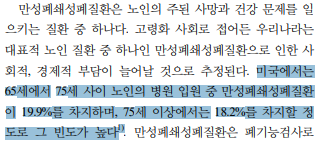

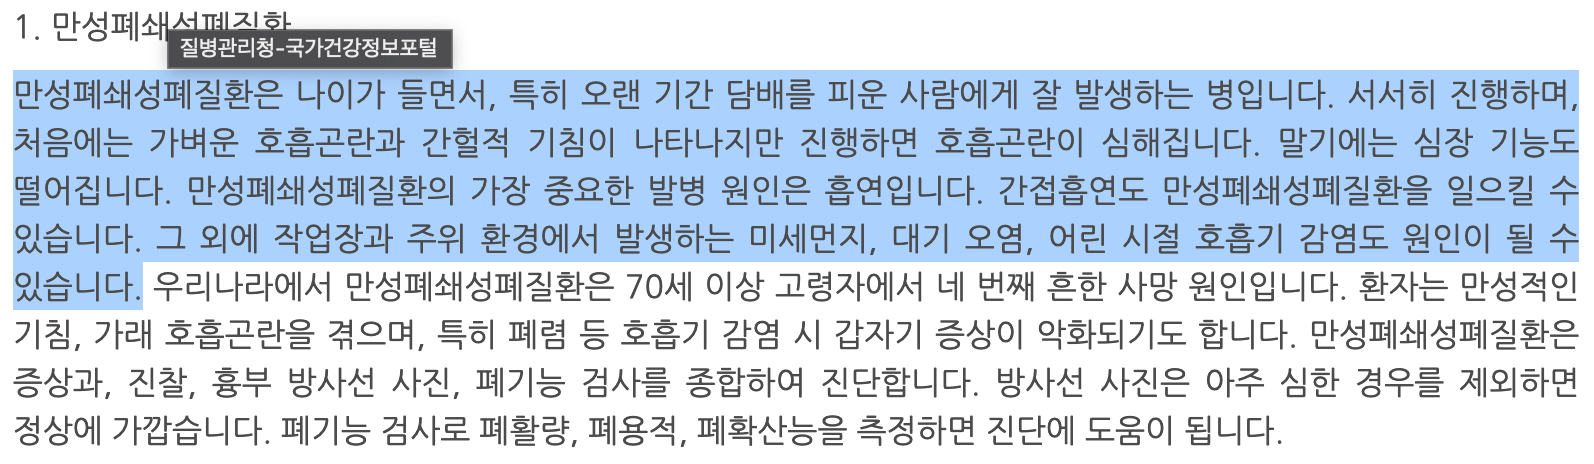

> 실제로 만성폐쇄성폐질환이 노인의 주된 사망과 건강 문제를 일으키는 질환 중 하나이다.  
나이가 들 수록 폐기능이 떨어지고 기저 질환 발생 가능성이 높기 때문이다. 

### (2) gender(성별) 
(0: 여자, 1: 남자) 

In [24]:
# gender에 따른 COPD 도수 확인
print_freq('gender', 'COPD')

gender  COPD
1       중증      50
0       중증      28
1       경증      15
0       경증       8
Name: count, dtype: int64

In [25]:
# 여성의 COPD 중증도 비율
print_COPD('gender', 'COPD', 0)

중증: 77.78%
경증: 22.22%


In [26]:
# 남성의 COPD 중증도 비율
print_COPD('gender', 'COPD', 1)

중증: 76.92%
경증: 23.08%


> 성별에 따른 중증의 비율에는 큰 차이가 없는 예측하지 못한 결과를 확인하였다.  
일반적으로 남성 흡연자가 더 많기 때문에 COPD 중증도 비율도 더 높을 것으로 예측했지만 거의 비슷한 결과를 보였다.

노인 만성폐쇄성폐질환  
https://www.ekjm.org/upload/750208003.pdf

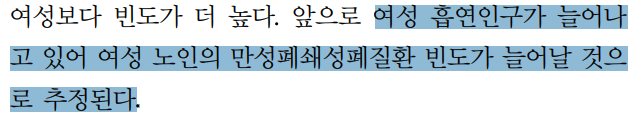

> 아마도, 최근에는 여성 흡연인구도 늘고 있는 추세이므로 여성의 COPD 중증 비율이 높아진게 아닐까 추측된다.

### (3) smoking(흡연 상태) 
(1: 현재 끊은 사람, 2: 현재 흡연자) 

In [27]:
# smoking에 따른 COPD 도수 확인
print_freq('smoking', 'COPD')

smoking  COPD
2        중증      67
         경증      18
1        중증      11
         경증       5
Name: count, dtype: int64

In [28]:
# 금연자의 COPD 중증도 비율
print_COPD('smoking', 'COPD', 1)

중증: 68.75%
경증: 31.25%


In [29]:
# 흡연자의 COPD 중증도 비율
print_COPD('smoking', 'COPD', 2)

중증: 78.82%
경증: 21.18%


> 금연자보다 흡연자의 COPD 중증도 비율이 더 많은 것으로 확인되었다.  
또한, 금연자의 경우에도 과거 흡연을 한 경험이 있기 때문에 중증의 비율이 결코 적지 않았다.

흡연과 만성폐쇄성폐질환  
https://www.kdca.go.kr/filepath/boardDownload.es?bid=0034&list_no=365521&seq=1

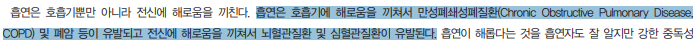

> 실제로 흡연은 만성폐쇄성폐질환 및 폐암 등을 유발하고 뇌혈관질환 및 심혈관질환을 유발한다.

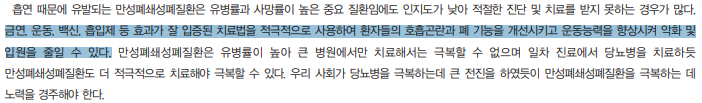

> 따라서 금연, 운동, 백신 등과 같은 효과적인 치료법으로 폐 기능을 개선시키고 운동능력을 향상시키는 것이 중요하다.

### (4) Diabetes(당뇨병)  
(0: 없음, 1: 있음)  

In [30]:
# Diabetes에 따른 COPD 도수 확인
print_freq('Diabetes', 'COPD')

Diabetes  COPD
0         중증      61
          경증      19
1         중증      17
          경증       4
Name: count, dtype: int64

In [31]:
# 당뇨병X의 COPD 중증도 비율
print_COPD('Diabetes', 'COPD', 0)

중증: 76.25%
경증: 23.75%


In [32]:
# 당뇨병O의 COPD 중증도 비율
print_COPD('Diabetes', 'COPD', 1)

중증: 80.95%
경증: 19.05%


> 당뇨병의 유무에 따른 COPD 중증도의 차이는 없는 것으로 확인되었다.  
이를 통해 만성폐쇄성폐질환에 대한 당뇨병의 영향력이 약하다고 추측했다.

### (5) AtrialFib(심방세동 유무)  
#### 심방 세동: 심방의 수축이 소실되어 불규칙하게 수축하는 상태로, 부정맥의 일종  
(0: 없음, 1: 있음)  

In [33]:
# AtrialFib에 따른 COPD 도수 확인
print_freq('AtrialFib', 'COPD')

AtrialFib  COPD
0          중증      61
           경증      20
1          중증      17
           경증       3
Name: count, dtype: int64

In [34]:
# 심방세동X의 COPD 중증도 비율
print_COPD('AtrialFib', 'COPD', 0)

중증: 75.31%
경증: 24.69%


In [35]:
# 심방세동O의 COPD 중증도 비율
print_COPD('AtrialFib', 'COPD', 1)

중증: 85.0%
경증: 15.0%


> 심방세동이 있는 사람의 COPD 중증도 비율이 높은 것으로 확인되었다.  

심방세동 환자에서 폐기능장애와의 상관관계  
https://kumel.medlib.dsmc.or.kr/bitstream/2015.oak/15361/1/25-20.pdf

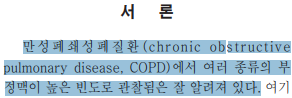

> 만성폐쇄성폐질환에서 심방세동을 비롯한 여러 종류의 부정맥이 관찰되었다는 것을 확인하였다.

왼쪽 가슴이 답답한 증세, 호흡곤란 증상이 있다면?  
https://iheartwell.com/htm/community_info_read.php?id=1442&mode=&cate=&page=33&key=&keyword=

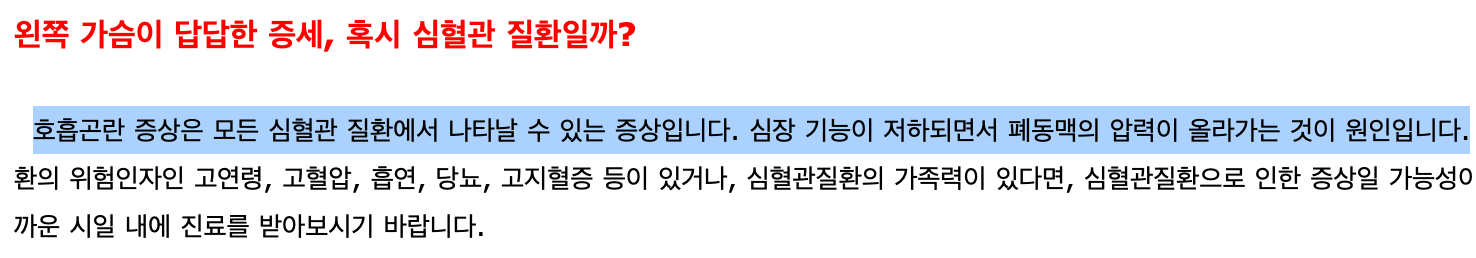

> 관련 논문 확인 시 심방세동 환자에게서 폐기능장애가 있으며 심장 기능이 저하되면서 폐동맥의 압력이 올라가는 것이 원인일 수 있다는 내용을 확인하였다.

## 아쉬운 점
처음에 전 세계 사망 원인 4위까지의 데이터를 조원들끼리 각각 분석하기로 정했는데 COPD(만성폐쇄성폐질환) 데이터를 구하기가 너무 힘들었고 겨우 구한 데이터의 행이 101개 밖에 되지 않아 분석의 신뢰성을 충분히 확보하지 못한 점이 아쉬웠습니다. 

좀 더 많은 양의 데이터를 확보하여 신뢰성 있는 분석을 진행했다면 더 정확한 분석이 가능했을 것이라 생각합니다.

## 결론

숨이 자주 가쁘고 잦은 기침을 한다면, 만성폐쇄성페질환  
https://www.snubh.org/service/info/com/view.do?BNO=479&Board_ID=B004

만성폐쇄성폐질환(COPD) 제대로 알고 예방하기  
https://yumc.ac.kr/rcrd/html/?doc=bbs/board.php&bo_table=edu_cardnews&page=1&wr_id=3

노인 호흡곤란  
https://health.kdca.go.kr/healthinfo/biz/health/gnrlzHealthInfo/gnrlzHealthInfo/gnrlzHealthInfoView.do?cntnts_sn=5253

만성 폐질환, 심장마비ㆍ뇌졸중 위험 증가  
https://www.newsmp.com/news/articleView.html?idxno=69224

"COPD 환자도 폐암 검진 대상 포함 바람직"  
https://www.docdocdoc.co.kr/news/articleView.html?idxno=1080132

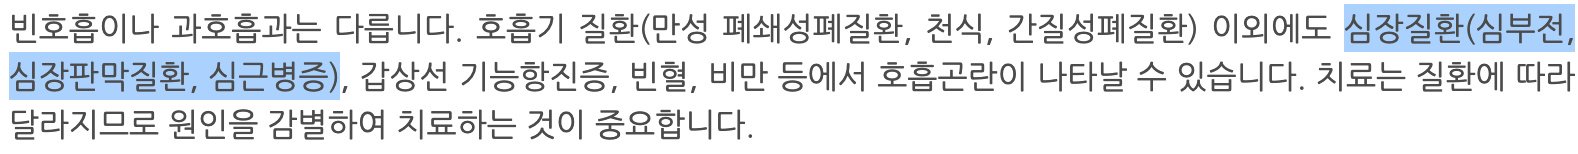

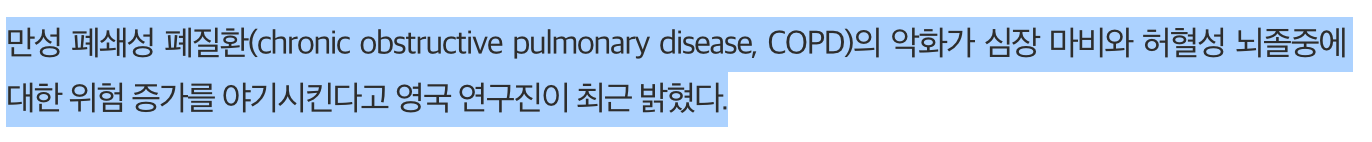

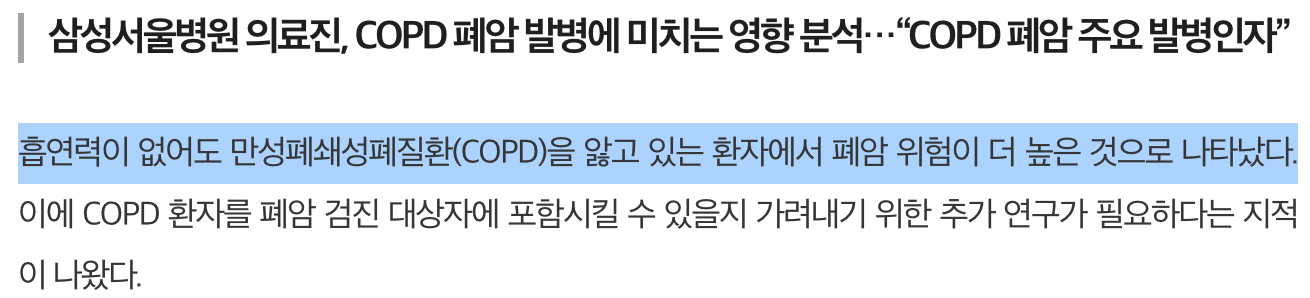

위와 같이 폐쇄성폐질환은 심장질환, 뇌졸중, 폐암에서와 같이 다양한 질병에서 함께 나타날 수 있으며 전 세계 사망 원인 상위의 질병들이 모두 서로 연관이 있고 관련 질병들을 공유한다는 점을 확인하였습니다. 무엇보다 전 세계 사망 원인 상위의 질병 모두가 흡연과 연관이 있는 것으로 보아 흡연이 각종 심각한 질병들의 원인이 되는 경우가 많다는 것을 느꼈습니다. 물론 흡연 이외의 다양한 요인들이 있겠지만, 이번 분석을 통해 살펴본 바로는 국민의 건강을 증진시키고 행복한 삶을 위해서 국가에서 금연을 위한 정책을 많이 펼치고 흡연자 분들도 흡연 이외의 다른 방법으로 건전하게 기분 전환하고 스트레스를 푸는 방안을 모색하는 것이 중요하다는 결론을 내렸습니다.

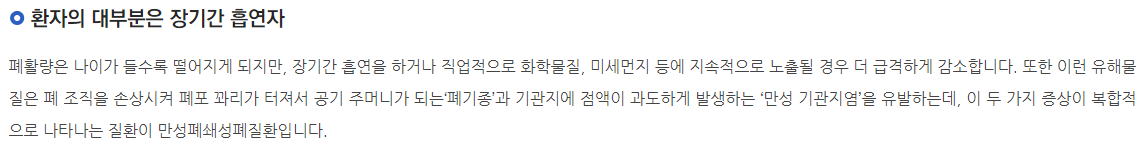
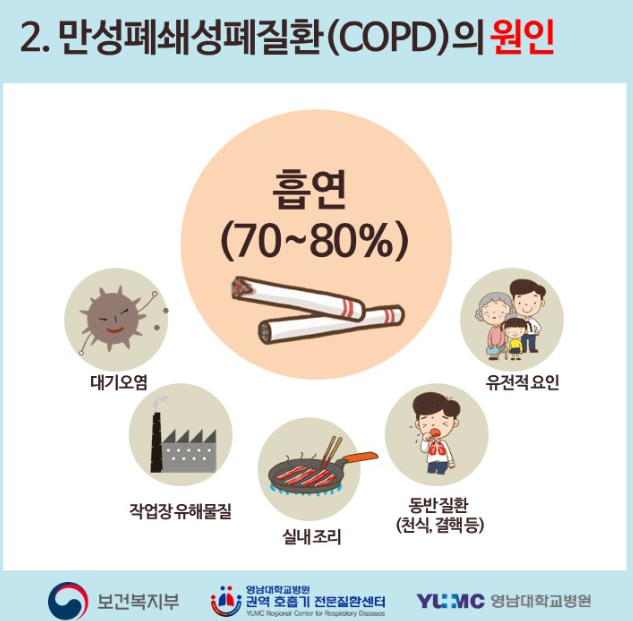